# Allstate Claims Severity

Allstate is a personal insurer in the United States . It is trying to improve  claims system by predicting the claim automatically using Machine Learning to reducing manual work . Here we need to leverage the power of Machine Learning algorithms  and help Allstate predict the cost(severity) of the claim accurately . Efficiencies in insurance claim severity analysis can help keep rates lower for consumers, and provide targeted assistance to better serve them.Each datapoint in dataset represents a claim . We are given with training  dataset which contains loss associated with that claim .

Data : It is provided by Allstate on kaggle as it is private data it is anonymized .Here is the link to download the data . 
https://www.kaggle.com/c/allstate-claims-severity/data

## Why Machine Learning ? : 

As we can see that the data is multi dimensional .Its very difficult to programmatically define rules for each case and predict the final claim amount. This is where machine Learning algorithms comes to picture . If we input the data and results to the algorithm it will learn the rules .

Below fig describes it . 



![image](https://qph.fs.quoracdn.net/main-qimg-b9d72d501d7ce19f8aecfd9c1a1735dc)

## Metric :

Metric we are using is MAE(Mean Absolute Error)

$ MAE = \frac{\sum_{i=1}^{n} |{y_i-\hat{y_i}}|}{n} $ 

From the above formula we can say that MAE is the average of difference between acutal value and predicted value .

MAE is a common and simple metric that has the advantage of being in the same unit as our target, which means it can be compared to target values and easily interpreted.

MAE can be easily interpretable as it is simple and easy to calculate.

Given an MAE score and number of points we can estimate the how close the predict values are to actual values . Which not that easy in RMSE . 

On the other hand RMSE is 


$RMSE = \sqrt{\frac{\sum_{i=1}^n (y_i-\hat{y_i})^2}{n}}$

Outliers affect RMSE more than MAE . 

Consider an outlier it will have huge difference between Predicted and actual value if we square such huge number it will still be higher contributing more the error metric . Thus RMSE will be affected more in the presence of outliers.  Where as in case of MAE its the absolute difference between the actual and predict value which is less when compared with squaring the error. MAE is some what robust to outliers. 




In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,te;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5325/88895/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1601636545&Signature=OYgeuEiAZ8nX8%2FVncqwJce6YZFdkKADmvmkd8WBehEJv9WRNWUiXr%2FHLMkb6YSYlUn3LSmMZLdb1f74uXNrmlpAIYlygkeGhqf%2BlN3ltmD3X19E6M9cScnoNf59sdPVoNFbXeWa25iyhdJt4Dtu83Q242BRLtKbN6zBXFvzSLUFQoIXjTVLuTdDUw92PAh8XAD0Q%2BT%2FmxR2aP6wGWuZzGjIV51ebHNyiyGrHfeNkMkRn1glWRbCFKNIAqHM%2FXC3CxeP076V%2FS59369Rh0mMyulHMOMj9aO0esOqcJJzRqLX7SZFK9xmJnqfvUU8BjoHQD0VeF%2BrehQyzQvO3V22KoA%3D%3D&response-content-disposition=attachment%3B+filename%3Dallstate-claims-severity.zip" -c -O 'allstate-claims-severity.zip'

--2020-09-29 11:02:44--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5325/88895/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1601636545&Signature=OYgeuEiAZ8nX8%2FVncqwJce6YZFdkKADmvmkd8WBehEJv9WRNWUiXr%2FHLMkb6YSYlUn3LSmMZLdb1f74uXNrmlpAIYlygkeGhqf%2BlN3ltmD3X19E6M9cScnoNf59sdPVoNFbXeWa25iyhdJt4Dtu83Q242BRLtKbN6zBXFvzSLUFQoIXjTVLuTdDUw92PAh8XAD0Q%2BT%2FmxR2aP6wGWuZzGjIV51ebHNyiyGrHfeNkMkRn1glWRbCFKNIAqHM%2FXC3CxeP076V%2FS59369Rh0mMyulHMOMj9aO0esOqcJJzRqLX7SZFK9xmJnqfvUU8BjoHQD0VeF%2BrehQyzQvO3V22KoA%3D%3D&response-content-disposition=attachment%3B+filename%3Dallstate-claims-severity.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51204863 (49M) [application/zip]
Saving to: ‘allstate-claims-severity.zip’



In [ ]:
!unzip '/content/allstate-claims-severity.zip'

Archive:  /content/allstate-claims-severity.zip
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv               
  inflating: train.csv.zip           


In [ ]:
import warnings
warnings.filterwarnings("ignore") # ignoring warnings

# importing the required libraries 
import random 
import pandas as pd 
import numpy as np
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from collections import Counter 
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

## Loading Data

In [ ]:
# loading the train and test data into pandas dataframe

tr_df = pd.read_csv('/content/train.csv')
te_df = pd.read_csv('/content/test.csv')

In [ ]:
# printing the shape of the dataframe 

print('Shape of train dataset : ',tr_df.shape)
print('Shape of test dataset : ', te_df.shape)

Shape of train dataset :  (188318, 132)
Shape of test dataset :  (125546, 131)


## Observation : 
Training data set contains 188318 rows and 132 features which includes loss 

Test data set contains 125546 rows and 131 features its same as training dataset but without loss .

In [ ]:
# printing sample rows of data 

tr_df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


Observations : 

"id": Unique identifier of an insurance claim lodged

"cat1" to "cat116": Categorical variables (masked)

"cont1" to "cont14": Continuous variables (masked)

"loss": The amount of claim the company has to pay out. This is the target variable present in training data.

Here we can see that features are made anonymous. So , we cannot interpret which features will be more important in prediction.

For  categorical features starts column name with 'cat' and for continuous features starts column name with 'cont' . 

In [ ]:
te_df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,...,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,...,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


## Dataset Overview 

In [ ]:
# printing data overview 

print('Overview of train data : \n')
tr_df.info()
print('\n')
print('Overview of test data : \n')
te_df.info()

Overview of train data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


Overview of test data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


Handling Missing Values 

In [ ]:
# https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

print('Number of missing values in train dataset : ',int(tr_df.isnull().values.any()))
print('Number of missing values in test  dataset : ',int(te_df.isnull().values.any()))

Number of missing values in train dataset :  0
Number of missing values in test  dataset :  0


There are no missing values in the data provided . 

In [ ]:
# checking for duplicates 
print('Number of duplicates in train dataset : ' ,tr_df.shape[0]-tr_df['id'].nunique())

print('Number of duplicates in test dataset : ' ,te_df.shape[0]-te_df['id'].nunique())

Number of duplicates in train dataset :  0
Number of duplicates in test dataset :  0


As each claim is represented by unique id . There are no duplicates in the data.

In [ ]:
# Getting categorical column names and continous column names 

cat_features = [i for i in tr_df.columns if i[:3]=='cat']

cont_features = [i for i in tr_df.columns if i[:4]=='cont']

In [ ]:
# printing the number of categorical and continuous features
 
print('Number of Categorical Features : {} \n'.format(len(cat_features)))

print('Number of Continuous Features : {}'.format(len(cont_features)))

Number of Categorical Features : 116 

Number of Continuous Features : 14


Observation: There in total 116 Categorical features and 14 Continuous features 

## Analyzing unique values of categorical Features

In [ ]:
# Number of unique values
unique_cat = tr_df[cat_features].nunique()

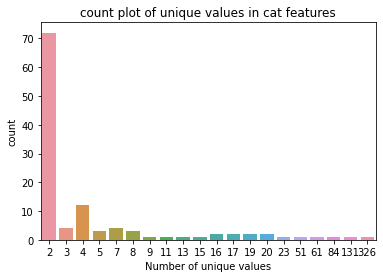

In [ ]:
# plotting number of unique values each categorical feature takes 

sns.countplot(unique_cat)
plt.xlabel('Number of unique values')
plt.title('count plot of unique values in cat features')
plt.show()

Observations : 
Out of 116 categorical Features 72 features contains only 2 distinct values('A' & 'B').

There are very few categorical features which more than 10 distinct values .



In [ ]:
Counter(unique_cat)

Counter({2: 72,
         3: 4,
         4: 12,
         5: 3,
         7: 4,
         8: 3,
         9: 1,
         11: 1,
         13: 1,
         15: 1,
         16: 2,
         17: 2,
         19: 2,
         20: 2,
         23: 1,
         51: 1,
         61: 1,
         84: 1,
         131: 1,
         326: 1})

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

unique_cat.idxmax()

'cat116'

cat116 contains maximum number of distinct values nealy(326).

## Correlation Between Categorical Features

In [ ]:
data=deepcopy(tr_df)
le = LabelEncoder()

# Label encoding the categorical Features 
for i in cat_features:
    data[i]= le.fit_transform(data[i]) 

In [ ]:
#https://stackoverflow.com/questions/34902649/how-do-i-loop-across-a-correlation-matrix-to-only-give-me-pairs-of-correlations

corr = data[cat_features].corr().values #computing correlation between Categorical Features 

high_corr ={} 

hf=pd.DataFrame() # create empty dataframe to store highly correlated features

# Traversing through correlation matrix 
for i in range(len(cat_features)):
    for j in range(len(cat_features)):
        #Traversing through only lower triangular matrix
        if corr[i,j] > 0.8 and corr[i,j] != 1 and i<=j: #only if correlation value is greater than 0.8
            high_corr['(cat'+str(i+1)+','+'cat'+str(j+1)+')']=round(corr[i,j],5)   

hf['Correlated features']=list(high_corr.keys())
hf['Correlation Coefficient']=list(high_corr.values())       

In [ ]:
# sorting the dataframe based on Correlation value 

hf.sort_values('Correlation Coefficient',ascending=False)

,Correlated features,Correlation Coefficient
1,"(cat3,cat90)",0.95574
6,"(cat7,cat89)",0.95550
0,"(cat2,cat9)",0.93242
3,"(cat6,cat50)",0.92573
11,"(cat104,cat116)",0.91819
8,"(cat8,cat102)",0.90080
9,"(cat86,cat98)",0.88677
7,"(cat8,cat66)",0.86223
10,"(cat86,cat115)",0.85015
2,"(cat4,cat111)",0.82993


Observation : 
'cat3' and 'cat90' are highly correlated 

No features are correlated with value 1 .

## Adding Features from highly correlated categorical features 

In [ ]:
# As cat3 and cat90 are highly correlated adding new features which says both are same or different .
# 1 if same 0 if different ..... same for remaining features .. 

tr_df['is_cat3_sameas_cat90']=np.where(tr_df['cat3']==tr_df['cat90'],1,0)

tr_df['is_cat7_sameas_cat89']=np.where(tr_df['cat7']==tr_df['cat89'],1,0)

tr_df['is_cat2_sameas_cat9']=np.where(tr_df['cat2']==tr_df['cat9'],1,0)

tr_df['is_cat6_sameas_cat50']=np.where(tr_df['cat6']==tr_df['cat50'],1,0)

In [ ]:
# adding extra features for test data 
te_df['is_cat3_sameas_cat90']=np.where(te_df['cat3']==te_df['cat90'],1,0)

te_df['is_cat7_sameas_cat89']=np.where(te_df['cat7']==te_df['cat89'],1,0)

te_df['is_cat2_sameas_cat9']=np.where(te_df['cat2']==te_df['cat9'],1,0)

te_df['is_cat6_sameas_cat50']=np.where(te_df['cat6']==te_df['cat50'],1,0)

Here we are adding new features based on the highly correlated  categorical features . If both new feature takes a value of 1 if they are different it takes a value of 0.

## Plotting  random categorical Features :

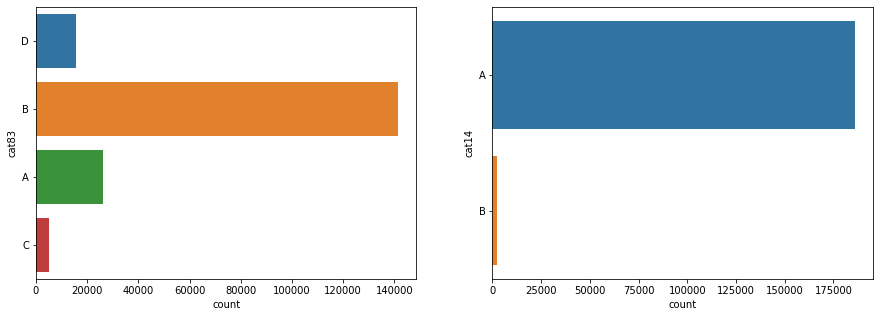

In [ ]:
# plotting random catergorical features 

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y=tr_df['cat'+str(random.randint(1,116))]) # selecting random integer within 1 to 116 
plt.subplot(1,2,2)
sns.countplot(y=tr_df['cat'+str(random.randint(1,116))])
plt.show()

Observation : 
From the above plot we can say that some values occur very few times in the Categorical features .  

## Percentage of unseen data present in test data 

In [ ]:
# what percentage of unseen data can we expect in test data for each categorical features
# analysing categorical features in test data how different they are from train data

per_unseen={}
for i in cat_features:
    train_ = set(tr_df[i].unique())
    test_ = set(te_df[i].unique())
    pr_te_ab_tr =  test_ - train_
    count = 0
    for b in pr_te_ab_tr:
        count+=te_df[te_df[i]==b].shape[0]
    per_unseen[i]=count/te_df.shape[0]


feature = list(per_unseen.keys())[list(per_unseen.values()).index(max(list(per_unseen.values())))]

print('{0} contains {1}% of unseen data in test dataset'.format(feature,max(list(per_unseen.values()))*100))

cat116 contains 0.022302582320424386% of unseen data in test dataset


Observation : We can say that 'cat116' contains nearly 0.022% percentage of data that is not present train data but in test data 

## Analyzing Continuous Features 

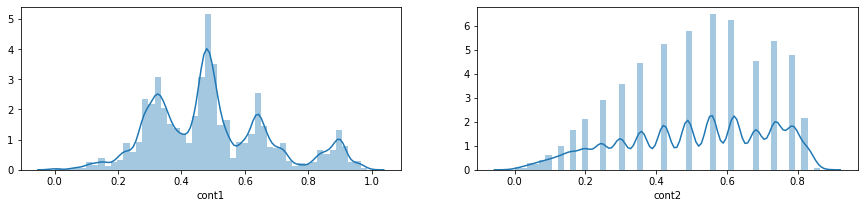

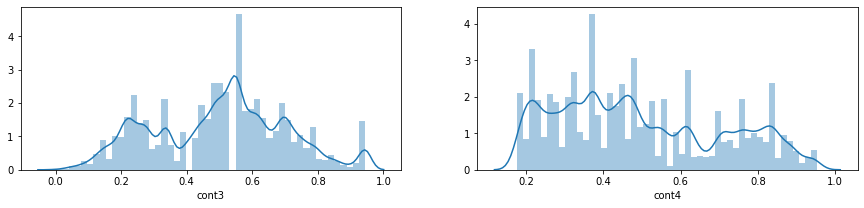

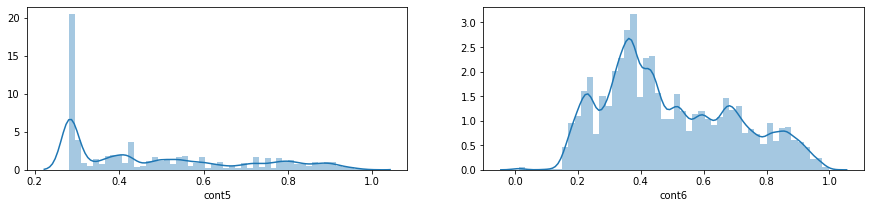

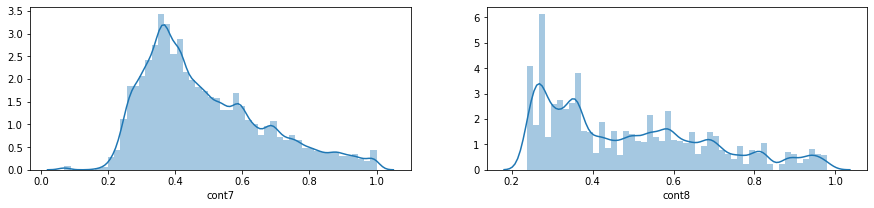

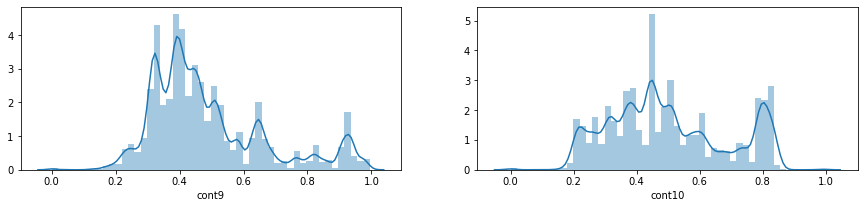

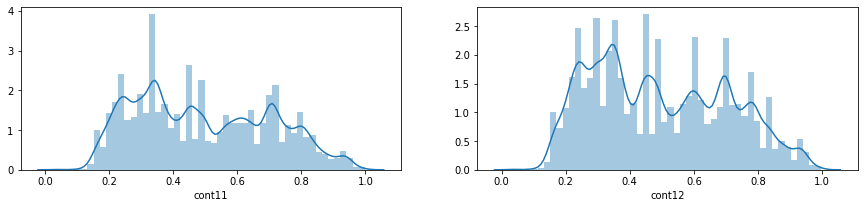

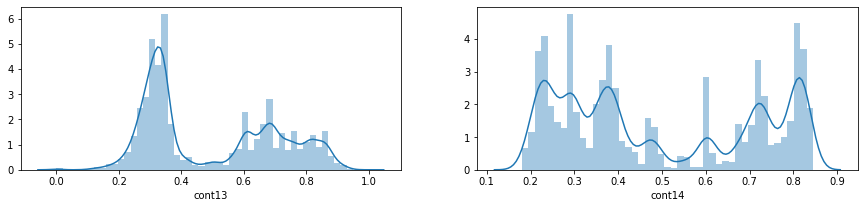

In [ ]:
# plotting the distribution plot of continuous features 

for i in range(0,len(cont_features), 2):
    plt.figure(i+1,figsize=(15,3))    
    plt.subplot(1,2,1)
    sns.distplot(tr_df[cont_features[i]])
    plt.subplot(1,2,2)
    sns.distplot(tr_df[cont_features[i+1]])
plt.show()

Observation : From the above plot we can say that some continuous features are highly skewed . Ex: 'cont5','cont8'

None of the continuous feature follows symmetric distribution . 

All the values of continuous features lies between 0 and 1 . i.e., data is normalized .

# Analysis of Skewed continuous random features .

In [ ]:
cont5_ = tr_df[['cont5','loss']]

cont5_[tr_df['cont5']<=0.35]['loss'].mean()


3064.596773744581

In [ ]:
cont5_[tr_df['cont5']>0.35]['loss'].mean()

3020.5221026015183

Observation : As cont5 features is highly skewed we taken 0.35 as threshold divided the data into 2 halfs and calculated mean of both halfs of the data they are almost same . 

In [ ]:
tr_df[cont_features].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


Observation : Mean of all the continuous features is nearly(0.5) 

All the values of continuous features lies between 0 and 1 .

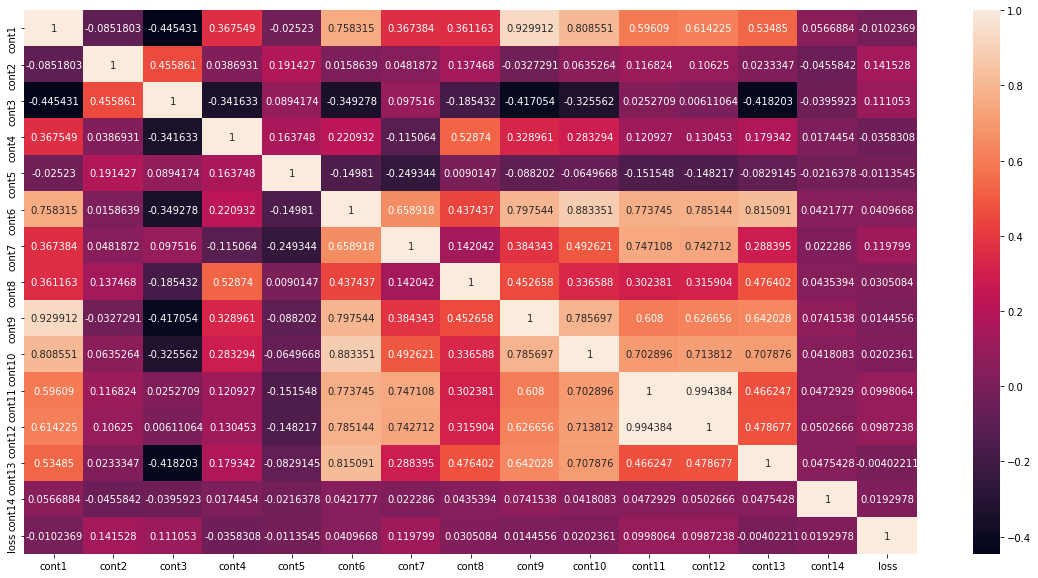

In [ ]:
features =cont_features
features.append('loss')
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(tr_df[features].corr(),annot=True,fmt='g',ax=ax) 
plt.show()

Observation : From above correlation matrix we can say that some features are highly correlated with other features . 

cont1 _ cont9 ,cont10

cont6 _ cont10 ,cont13

cont7 _ cont12 , cont11

cont9 _ cont1

cont10 _ cont6

cont11_cont12

cont13 _ cont6

## Visualizing Highly correlated continuous features 


In [ ]:
corr_features = [('cont1','cont9'),('cont1','cont10'),('cont6','cont10'),('cont6','cont13'),
                 ('cont7','cont12'),('cont7','cont11'),('cont9','cont1'),('cont10','cont6'),
                 ('cont11','cont12'),('cont13','cont6')]

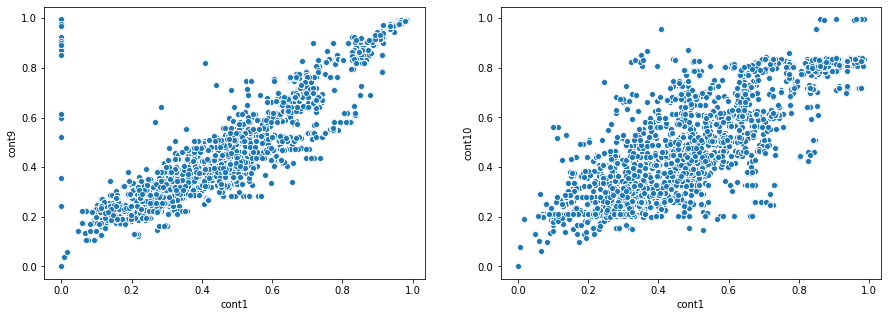

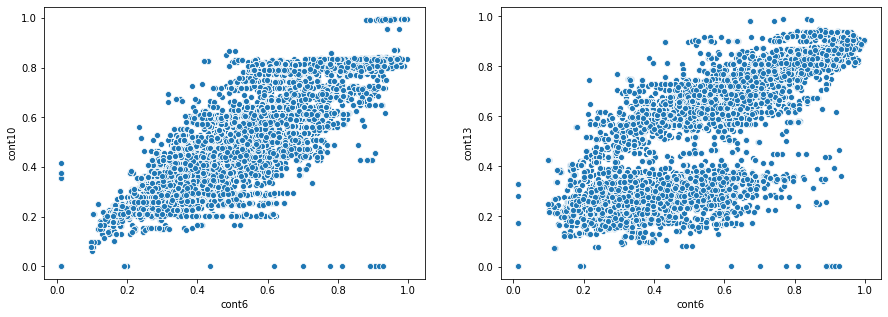

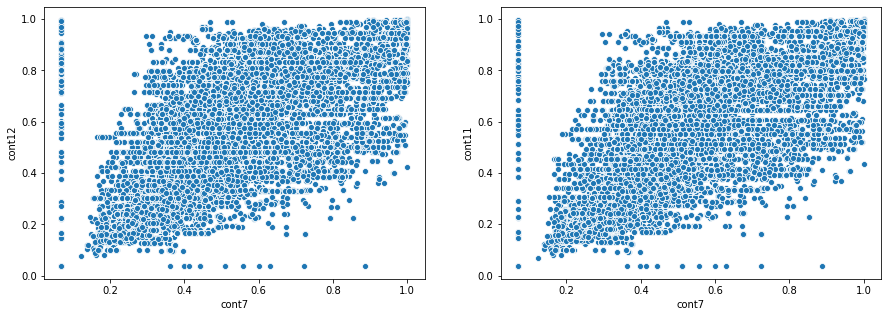

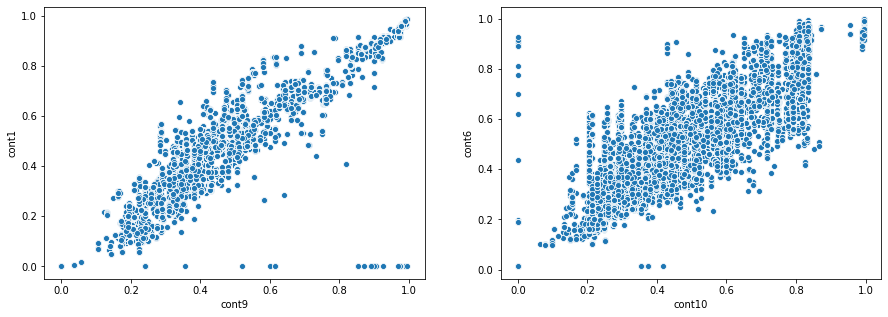

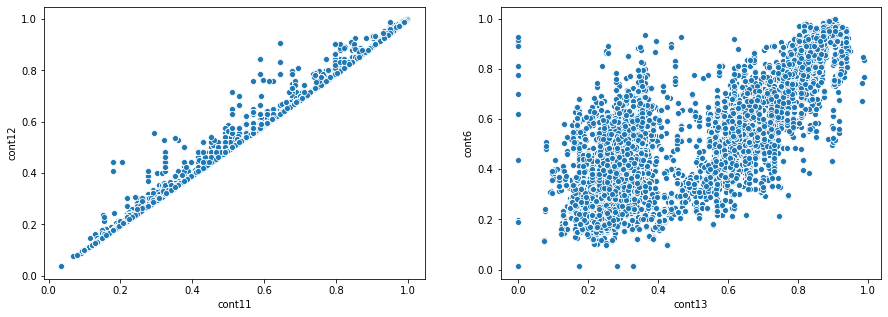

In [ ]:
for i in range(0,len(corr_features),2):
    plt.figure(i+1,figsize=(15,5))    
    plt.subplot(1,2,1)
    sns.scatterplot(x=tr_df[corr_features[i][0]],y=tr_df[corr_features[i][1]])
    plt.subplot(1,2,2)
    sns.scatterplot(x=tr_df[corr_features[i+1][0]],y=tr_df[corr_features[i+1][1]])
plt.show()

Observation : we can observe from the above graphs the 'cont11' and 'cont12' are highly correlated as there exists a linear relationship between them .



## Testing Multicollinearity of continuous Features

VIF (Variance Inflation Factor) : 

*   VIF starts at 1 and has no upper limit
*   VIF = 1, no correlation between the independent variable and the other variables

*   High VIF indicates high multicollinearity between this independent variable and the others





In [ ]:
# https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = tr_df[cont_features]

In [ ]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
vif

,variables,VIF
0,cont1,94.680126
1,cont2,10.837374
2,cont3,14.140590
3,cont4,11.084853
4,cont5,7.300608
5,cont6,135.947656
6,cont7,30.711271
7,cont8,14.545640
8,cont9,88.835173
9,cont10,57.340157


Observation : 

cont12 and cont11 have high VIF value implies they are highly correlated one of the feature can be dropped . We can also observe other features VIF scores are high as well this tells us continuous features are collinear .   

## Analyzing the Target values

Visualizing the loss values 

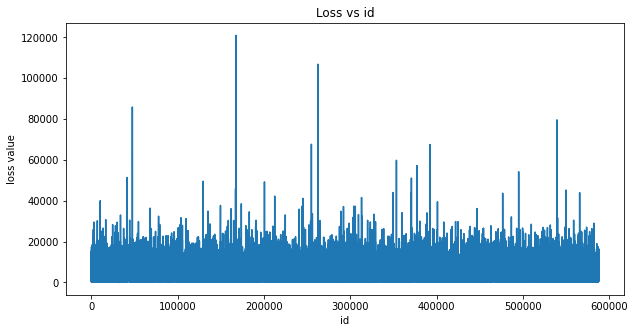

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(tr_df['id'],tr_df['loss'])
plt.ylabel('loss value')
plt.xlabel('id')
plt.title('Loss vs id')
plt.show()

Observation : We can observe the most of claim values lies between 0 to 20000$.

There are very few claims which are high . Normally we will consider them as outliers but in this case it cannot be done because it incurred huge loss to organisation .


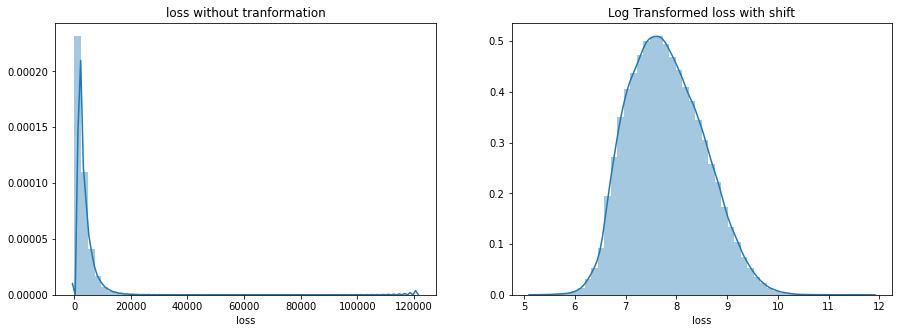

In [ ]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(tr_df['loss'])
plt.title('loss without tranformation')
plt.subplot(1,2,2)
sns.distplot(np.log(tr_df['loss']+200))
plt.title('Log Transformed loss with shift')
plt.show()

Observation : From the above plot we can conclude that the distribution of target values is highly skewed .

Most of the claims lies in the range of 0 to 20000.

Applying log transform with some shift on target values results in a some what symmetric distribution near to Gaussian Distribution 

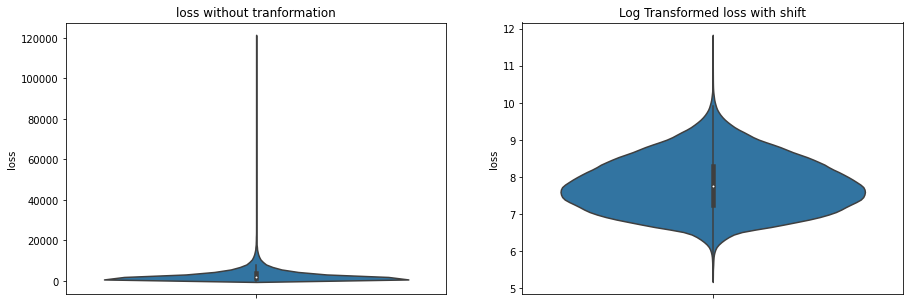

In [ ]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(y=tr_df['loss'])
plt.title('loss without tranformation')
plt.subplot(1,2,2)
sns.violinplot(y=np.log(tr_df['loss']+200))
plt.title('Log Transformed loss with shift')
plt.show()

Observation :Loss before transformation is highly skewed and IQR ranges are very close . But after applying the transforming the loss we will get unskewed distribution . 

## Checking Transformed loss follows Normal distribution or not 

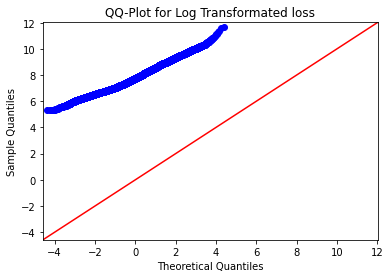

In [ ]:
sm.qqplot(np.log(tr_df['loss']+200), line='45')
plt.title('QQ-Plot for Log Transformated loss')
plt.show()

Observation : As we can observe that after applying log transform with some shift the loss seems to be a Gaussian . But , its not purely Gaussian as evident from Q-Q plot .

## Train and Test set differences 

### Preparing the data 

In [ ]:
# https://medium.com/@balajichippada.20/allstate-claims-severity-8ee0e4ecb2b5

test_df = te_df.drop('id',axis=1)
test_df['loss']=0

train_df = tr_df.drop(['id','loss'],axis=1)
train_df['loss']=1

data = pd.concat([train_df,test_df])

### Label Encoding the categorical features 

In [ ]:
le = LabelEncoder()

for i in cat_features:
    data[i]= le.fit_transform(data[i]) 

### Test Train Split 

In [ ]:
y = data['loss']
X = data.drop(['loss'],axis = 1)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25, random_state = 45)

### Training the model 

In [ ]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print('AUC : ',roc_auc_score(y_test,pred))

AUC :  0.5


we can see that AUC of the model is 0.5 .That implies the model is unable to seperate the train and test data which in turn implies both train and test data comes from same distribution .  

In [ ]:
pca = PCA(n_components=2)

X_reduced_tr = pca.fit_transform(X_train)
X_reduced_te = pca.fit_transform(X_test)

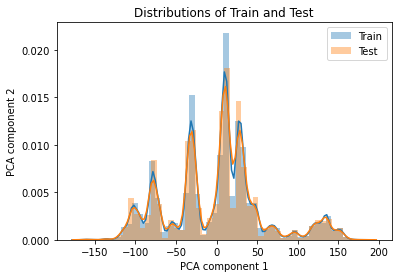

In [ ]:
sns.distplot(X_reduced_tr)
sns.distplot(X_reduced_te)
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Distributions of Train and Test')
plt.legend(['Train','Test'])
plt.show()

Observation : From the above plot we can conclude that Train data and Test data come from same Distributions and we cannot seperate them easily . 

## Analysing loss value based on state 

**Note** : Here we are assuming that 'cat112' feature corresponds to the states of US it can be true or false . Thanks to kaggle forum for this idea

In [ ]:
#https://www.kaggle.com/dmi3kno/all-the-allstate-states-eda

states = tr_df[['cat112','loss']].groupby('cat112') # grouping the dataframe based on state i.e., (cat112)

In [ ]:
state_loss_avg = {}
state_loss = pd.DataFrame(columns=['state','Avg.loss'])

for i in tr_df['cat112'].unique():
    state_loss_avg[i]=states.get_group(i).mean()['loss'] #computing mean loss for each state

state_loss['state']=list(state_loss_avg.keys())
state_loss['Avg.loss']=list(state_loss_avg.values())

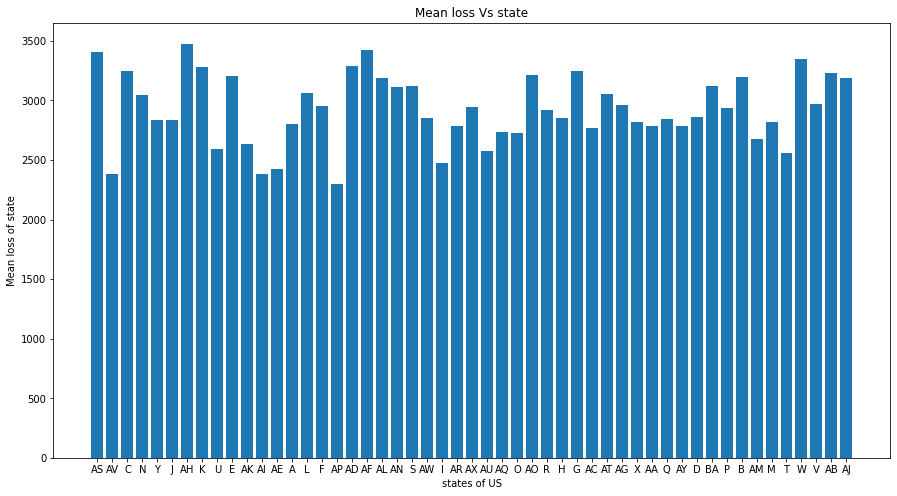

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(state_loss['state'],height=state_loss['Avg.loss'])
plt.xlabel('states of US')
plt.ylabel('Mean loss of state')
plt.title('Mean loss Vs state')
plt.show()

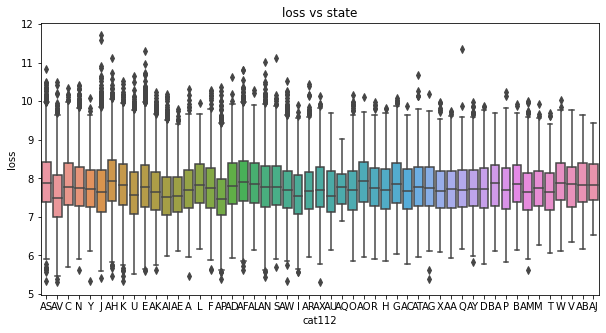

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=tr_df['cat112'],y=np.log(tr_df['loss']+200))
plt.title('loss vs state')
plt.show()

Observation : There is no much difference in the mean loss of each state .
Also we can see the feature alone not highly useful to predict the loss

# Feature importance :


In [ ]:
le = LabelEncoder()
for i in cat_features:
    tr_df[i]=le.fit_transform(tr_df[i])

In [ ]:
shift=200
y = np.log(tr_df['loss']+shift)
X = tr_df.drop(['loss','id'],axis = 1)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25, random_state = 45)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
error = mean_absolute_error(np.exp(pred)-shift,np.exp(y_test)-shift)

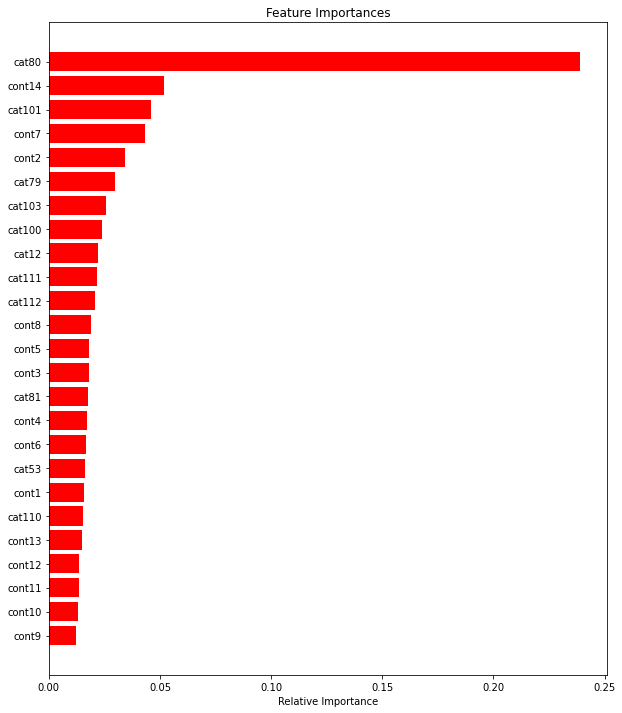

In [ ]:
features = X_train.columns 
importances = rf.feature_importances_ 
indices = (np.argsort(importances))[-25:] 
plt.figure(figsize=(10,12)) 
plt.title('Feature Importances') 
plt.barh(range(len(indices)), importances[indices], color='r', align='center') 
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Relative Importance') 
plt.show()

Observation : 

From the above graph we can observe that top 25 features which are highly important. 

we can say that 'cat80' feature is very important feature in predicting the claim. 

Most Continuous Features are present in top 25 important features . 

Also some categorical features  have high feature importance . 

Conclusion : 


*   Dataset given by Allstate claims is very clean without any missing values and Duplicates .  
*   It contains both categorical and continuous features . Very few categorical features contains more unique values . 

*   There are few features in both categorical and continuous features which are highly correlated . Usually we will drop highly correlated features but in this case we can't do that as it the features are unknown . 

*   Target is higly skewed , but after applying log transform with some shift we obtained a symmetric distribution . Going furthur we will use the transformed loss values as target . 

*   Most of the claims lies between 0 to 20000 USD 

*   Both Train anf Test come from same distribution which evident from the analysis using PCA and logisitic Regression. 

*   We also analysed what percent of unseen data is present in test for each categorical features . Mostly it is low values indicating that test and train comes from same distribution. 

*   Moving on we will do feature engineering , DataPreparation and building a model which predicts the claims. 

## Data preparation 

In [ ]:
#Label encoding the categorical features . 
#custom Label encoder to handle unseen values in test data. 

#https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values/56876351#56876351

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [ ]:
le = LabelEncoderExt()

for i in cat_features:
    le.fit(tr_df[i])
    tr_df[i]= le.transform(tr_df[i])
    te_df[i]= le.transform(te_df[i]) 

## Summary and EDA take aways :

Got insight of the data how many categorical features and continous features. 

Analysed how many distinct values each  categorical features contains and what percentage of unseen data for each categorical values are present in test data. 

Computed correlation between the categorical variable and included new features on highly correlated categorical features like are the both values same for a given datapoint . 

Computed correlation between Continuous Features and observed that some features are highly correlated . But did not drop the correlated features because continuous features are contributing a lot in predicting the claim.

Some Continuous features are highly skewed but the means of amount are almost same between two halfs when divided by some threshold .

And all the continuous features are Normalized. 

Analysed Target values and found that they are highly skewed and applying log transform with some shift will convert the target to nice symmetric distribution . 

Later performed analysis to determine weather both Train and Test data sets come from same distributions or not. 

Applied PCA and projected both train and test datasets to 2 dimensions and plotted the distributions and observed that they cannot be seperated easily and both comes from same distributions .

Analysed cat112 considering it as states of the US and calculated mean of each state plotted the box plot of all the states the mean of all states are same.

Trained simple random forest regressor to get the feature importance most of the continuous features are highly important in predicting the claim . There are some categorical features in top 25 important features . 


## Feature Engineering :

Added new features based on top 4 highly correlated  categorical features. If both the categorical values for a particular claim are same new feature takes the value of 1  if not it takes the value of 0 . 

As  there are many categorical features and few categorical features contains more distinct values One Hot Encoding the variables is not a good idea as it unnecessarily increase the dimensionality of the data . Hence , i performed Label encoding the categorical variables . To handle the unseen values in test data we replaced the unseen categorical variables with default unknown value as the percentage of unseen data is very small . 


Adding some interactions of categorical features as we have many categorical variables we choose top 30 categorical features and add the combinations of these 30 categorical features . 

As we are getting extra features we will  lexical encode the additional combinations of categorical features . 
